# Binary classification using Transfer Learning

Dataset with driver based train test and validation splits can be downloaded from
https://drive.google.com/drive/folders/1X9lnSYqZspRQZBzZesDEMxsY-be_ka3Y?usp=sharing

In [1]:
# import the required libraries
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics import accuracy_score

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import DirectoryIterator
from keras.callbacks import ModelCheckpoint

In [2]:
# Checking for GPU
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Using Naive CNN

In [21]:
scaler = ImageDataGenerator(rescale=1./255, validation_split=0.15)
train = DirectoryIterator('full/',scaler, target_size=(224,224),color_mode='rgb', seed=1,  batch_size=50)
val = DirectoryIterator('fullval/',scaler, target_size=(224,224),color_mode='rgb', seed=1,  batch_size=50)
test = DirectoryIterator('fulltest/',scaler, target_size=(224,224),color_mode='rgb', seed=1,  batch_size=50)

Found 15585 images belonging to 2 classes.
Found 3540 images belonging to 2 classes.
Found 3299 images belonging to 2 classes.


In [33]:
naive = Sequential()

naive.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding = 'same'))
naive.add(BatchNormalization())
naive.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding = 'same'))
naive.add(BatchNormalization())
naive.add(MaxPooling2D(pool_size=(2, 2)))

naive.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
naive.add(BatchNormalization())
naive.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
naive.add(BatchNormalization())
naive.add(MaxPooling2D(pool_size=(2, 2)))



naive.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
naive.add(BatchNormalization())
naive.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
naive.add(BatchNormalization())
naive.add(MaxPooling2D(pool_size=(2, 2)))


naive.add(Conv2D(256,kernel_size = (3,3),activation = 'relu',padding = 'same'))
naive.add(BatchNormalization())
naive.add(Conv2D(256,kernel_size = (3,3),activation = 'relu',padding = 'same'))
naive.add(BatchNormalization())
naive.add(MaxPooling2D(pool_size=(2, 2)))
naive.add(Dropout(0.4))
naive.add(Flatten())

naive.add(Dense(128, activation = 'relu'))
naive.add(Dense(128, activation = 'relu'))
naive.add(Dense(2, activation='softmax'))

naive.compile(loss='categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])

In [34]:
naive.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 112, 112, 64)     

In [35]:
generator = ImageDataGenerator(rescale=1./255,rotation_range=20, width_shift_range=0.2,height_shift_range=0.2, zoom_range=0.2)
augmentor = generator.flow_from_directory('full/', target_size=(224,224), color_mode = 'rgb', batch_size=50) 

Found 15585 images belonging to 2 classes.


In [44]:
callback = ModelCheckpoint(filepath='checkpoint/check.ckpt', save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)
baseHistory = naive.fit(train, epochs=15, validation_data=val, callbacks=[callback])
naive.load_weights('checkpoint/check.ckpt')
naive.evaluate(test)


Epoch 1/15
312/312 [==============================] - 100s 321ms/step - loss: 0.0474 - accuracy: 0.9845 - val_loss: 4.8692 - val_accuracy: 0.6466
Epoch 2/15
312/312 [==============================] - 98s 315ms/step - loss: 0.0478 - accuracy: 0.9848 - val_loss: 6.3804 - val_accuracy: 0.5915
Epoch 3/15
312/312 [==============================] - 106s 340ms/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 2.7412 - val_accuracy: 0.6514
Epoch 4/15
312/312 [==============================] - 98s 312ms/step - loss: 0.0501 - accuracy: 0.9864 - val_loss: 4.6567 - val_accuracy: 0.6189
Epoch 5/15
312/312 [==============================] - 94s 301ms/step - loss: 0.0231 - accuracy: 0.9940 - val_loss: 4.6731 - val_accuracy: 0.6596
Epoch 6/15
312/312 [==============================] - 97s 311ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 7.5108 - val_accuracy: 0.5729
Epoch 7/15
312/312 [==============================] - 97s 309ms/step - loss: 0.0599 - accuracy: 0.9848 - val_loss: 5.4412 - val_

[11.254483222961426, 0.4910579025745392]

In [45]:
augHistory = naive.fit(augmentor, epochs=15,validation_data=val, callbacks=[callback])
naive.load_weights('checkpoint/check.ckpt')
naive.evaluate(test)

Epoch 1/15
312/312 [==============================] - 244s 782ms/step - loss: 0.8310 - accuracy: 0.5496 - val_loss: 0.6600 - val_accuracy: 0.5997
Epoch 2/15
312/312 [==============================] - 251s 803ms/step - loss: 0.5817 - accuracy: 0.6918 - val_loss: 2.0288 - val_accuracy: 0.4989
Epoch 3/15
312/312 [==============================] - 251s 804ms/step - loss: 0.3986 - accuracy: 0.8225 - val_loss: 1.3944 - val_accuracy: 0.6486
Epoch 4/15
312/312 [==============================] - 251s 805ms/step - loss: 0.2656 - accuracy: 0.8898 - val_loss: 0.8719 - val_accuracy: 0.6915
Epoch 5/15
312/312 [==============================] - 244s 782ms/step - loss: 0.1846 - accuracy: 0.9265 - val_loss: 0.6326 - val_accuracy: 0.7407
Epoch 6/15
312/312 [==============================] - 235s 753ms/step - loss: 0.1307 - accuracy: 0.9498 - val_loss: 1.7967 - val_accuracy: 0.6983
Epoch 7/15
312/312 [==============================] - 231s 741ms/step - loss: 0.1065 - accuracy: 0.9605 - val_loss: 1.0086 -

[2.361462116241455, 0.621703565120697]

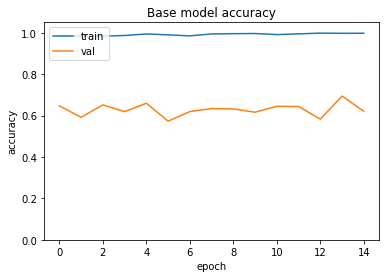

In [46]:
plt.plot(baseHistory.history['accuracy'])
plt.plot(baseHistory.history['val_accuracy'])
plt.title('Base model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1.05)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

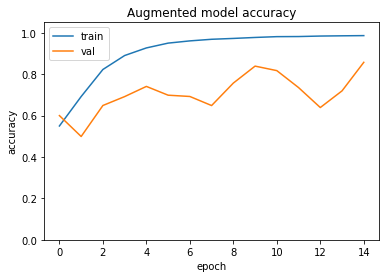

In [47]:
plt.plot(augHistory.history['accuracy'])
plt.plot(augHistory.history['val_accuracy'])
plt.title('Augmented model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1.05)
plt.legend(['train', 'val'], loc='upper left')
plt.show()